In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Training_Batch_Files/insurance_021119920_010222.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
# checking if null value exist
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [4]:
# checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#lets dive more into data and see statistics of our numerical data
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


from the data we can see that minimum age is 18 with BMI 16 ,having no kid and expenses of 1121,likewise 25% of our data contain the adult of age 27 ,with BMi 26,children none and expenses of 4740,following the trend 50% of our citizen are of age 39 who has BMi of 30,single children and expenses of 9380.As we surge towords 75% ,the mean age is 51 with BMI 34 ,2 kids and expenses of 16639.The max age is 64 with BMI 53.10 ,children 5 and expenses 63770.Overall, the average age is 39 with given data. Standard deviation is how far our each data lies from average,if low std then it is close to mean else spread to wide range.from the data we can see, our std for age is 14 with other recorder summery.

In [6]:
#lets dive more into data and see statistics of our object data
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


we can see from data ,male is most repeated gender having count of 676 and non smoker are comparetively higher ,finally more people belongs to southeast region

In [7]:
#lets categorize our data into numerical and categorical
numerical_feature = [feature for feature in df.columns if df[feature].dtypes!='O']
print('Total numerical features',len(numerical_feature))

Total numerical features 4


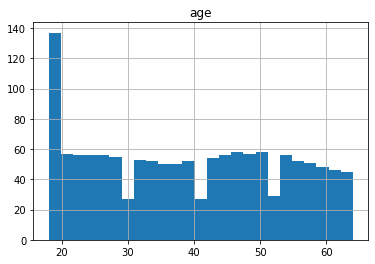

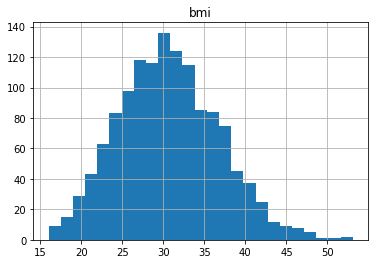

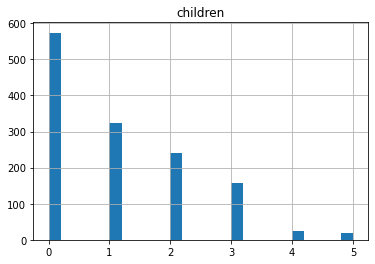

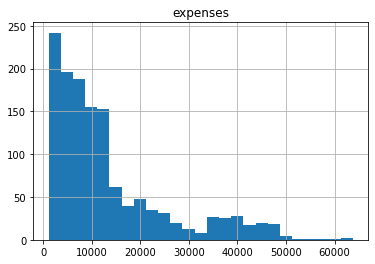

In [8]:
import matplotlib.pyplot as plt
for feature in numerical_feature:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.title(feature)
    
    plt.show()

AGE--> the data set of age columns are almost uniformly distributed apart from age 18 to 19 <br>

bmi--> the data set of bmi is normally disributed.<br>

Expenses--> from the plot we see that most of the people have the health expenses bellow 10000 and least number of individuals have policy of 60000 annualy.In addition the distribution is right skewed.

In [9]:
df['expenses'].skew()

1.51587966289798

<AxesSubplot:xlabel='bmi'>

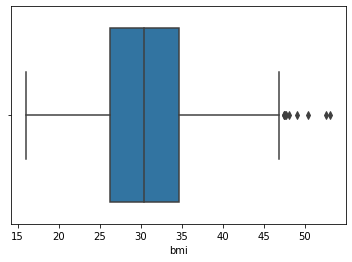

In [10]:
sns.boxplot(x=df['bmi'])

In [11]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['bmi']))
threshold = 3
print(np.where(z > 3))

(array([ 116,  847, 1047, 1317]),)


<AxesSubplot:xlabel='age'>

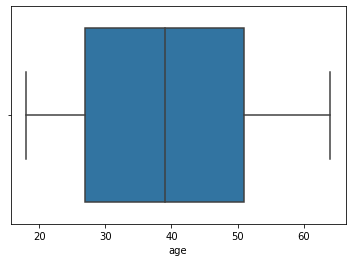

In [12]:
sns.boxplot(x=df['age'])

there is no presence of outlier in age feature

<AxesSubplot:xlabel='children'>

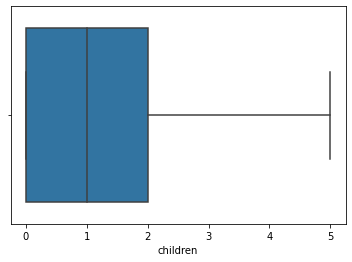

In [13]:
sns.boxplot(x=df['children'])

most of the data are left shifted with no presence of outlier

<AxesSubplot:xlabel='expenses'>

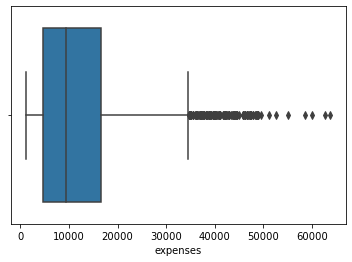

In [14]:
sns.boxplot(x=df['expenses'])

there is presence of outliers in expenses

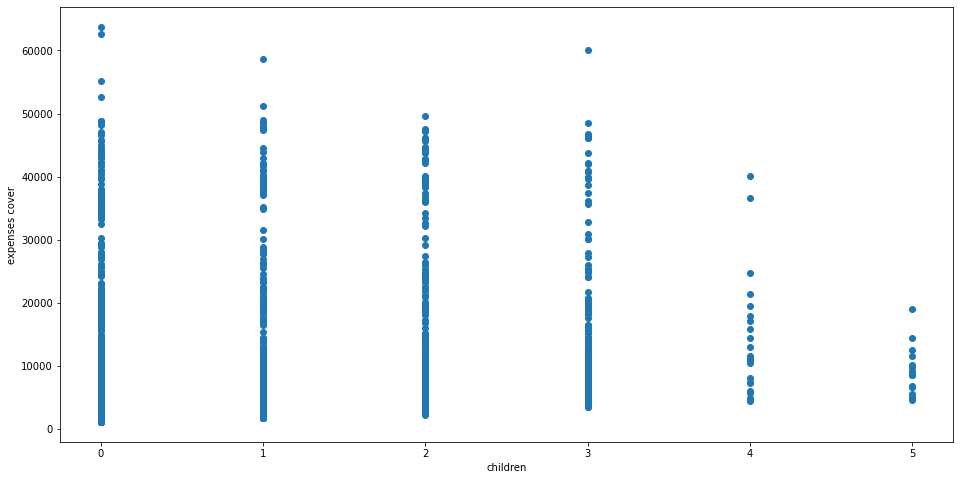

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['children'], df['expenses'])
ax.set_xlabel('children')
ax.set_ylabel('expenses cover')
plt.show()

 result shows that maxium insurance expenses are made by non children 

In [15]:
#checking categorical feature
categorical_feature = [feature for feature in df.columns if df[feature].dtypes=='O']
print('Total categorical features',len(categorical_feature))

Total categorical features 3


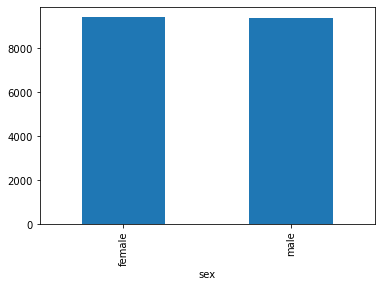

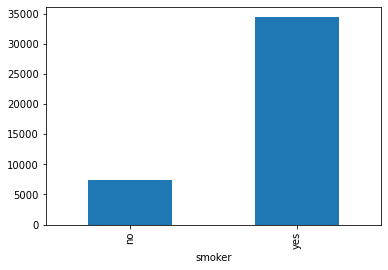

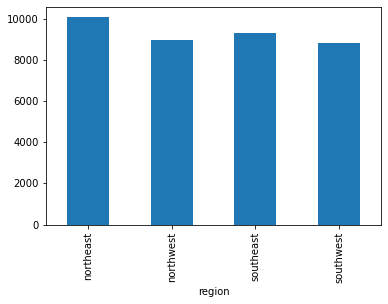

In [16]:
for feature in categorical_feature:
    data = df.copy()
    data.groupby(df[feature])['expenses'].median().plot.bar()
    plt.show()

from groupby data we saw that non smoker has comparetively less health expenses as compared to person who smokes moreover the median

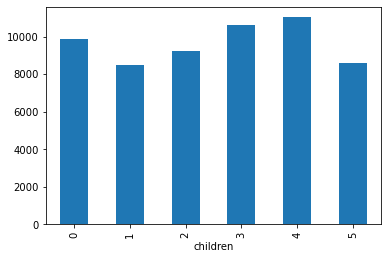

In [17]:
data.groupby('children')['expenses'].median().plot.bar()
plt.show()

the distibution of children with expenses cover is quite similar

# Correlation of numerical data

Text(0.5, 1.0, 'numerical data correlation')

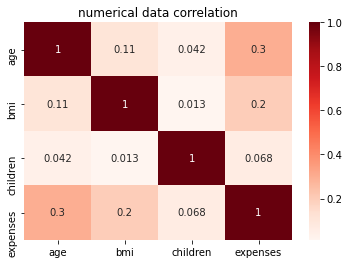

In [18]:
#finding the correlation of numerical data using heatmap
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('numerical data correlation')

from the plot we see that none of the data have closed relation to each other also there is no negative correalation

# Feature engineering

In [17]:
gender = pd.get_dummies(df['sex'],drop_first=True)

In [18]:
smokers = pd.get_dummies(df['smoker'],drop_first=True)

In [26]:
regions = df['region'].map({'southwest':0,'northwest':1,'northeast':2,'southeast':3})

In [27]:
new_data = pd.concat([regions,smokers,gender],axis=1)

In [30]:
new_data.head()

,region,yes,male
0,0,1,0
1,3,0,1
2,3,0,1
3,1,0,1
4,1,0,1


In [31]:
new_df = df.copy()
new_df.head() 

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [32]:
new_df.drop(['sex','smoker','region'],axis=1,inplace=True)

In [33]:
cat_data = pd.concat([new_df,new_data],axis=1)

In [34]:
cat_data.head()

,age,bmi,children,expenses,region,yes,male
0,19,27.9,0,16884.92,0,1,0
1,18,33.8,1,1725.55,3,0,1
2,28,33.0,3,4449.46,3,0,1
3,33,22.7,0,21984.47,1,0,1
4,32,28.9,0,3866.86,1,0,1


In [35]:
concat_df = cat_data.rename(columns={'yes':'smokes','male':'gender'})

In [36]:
concat_df.head()

,age,bmi,children,expenses,region,smokes,gender
0,19,27.9,0,16884.92,0,1,0
1,18,33.8,1,1725.55,3,0,1
2,28,33.0,3,4449.46,3,0,1
3,33,22.7,0,21984.47,1,0,1
4,32,28.9,0,3866.86,1,0,1


In [37]:
data_frame = concat_df.copy()

# Feature Scalling

In [38]:
X = data_frame.drop(['expenses'], axis=1)
y = data_frame['expenses']

In [39]:
# Splitting the dataset for training and testing the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
from sklearn.preprocessing import MinMaxScaler

feature_scale=[feature for feature in X_train]
scaler=MinMaxScaler()
scaler.fit(X_train[feature_scale])

MinMaxScaler()

In [41]:
scaler.transform(X_train[feature_scale])

array([[0.93478261, 0.4097035 , 0.        , 0.33333333, 0.        ,
        0.        ],
       [0.60869565, 0.31266846, 0.        , 0.        , 0.        ,
        1.        ],
       [0.7826087 , 0.42857143, 0.6       , 1.        , 0.        ,
        0.        ],
       ...,
       [0.86956522, 0.24797844, 0.        , 0.66666667, 0.        ,
        1.        ],
       [0.41304348, 0.85175202, 0.4       , 0.        , 1.        ,
        0.        ],
       [0.80434783, 0.37466307, 0.        , 0.        , 0.        ,
        1.        ]])

In [43]:
X_train  =pd.DataFrame(scaler.transform(X_train[feature_scale]), columns=feature_scale)

In [46]:
test_feature_scale=[feature for feature in X_test]
scaler=MinMaxScaler()
scaler.fit(X_test[test_feature_scale])

MinMaxScaler()

In [47]:
scaler.transform(X_test[test_feature_scale])

array([[0.58695652, 0.23463687, 0.4       , 0.66666667, 0.        ,
        0.        ],
       [0.39130435, 0.36871508, 0.        , 0.33333333, 0.        ,
        0.        ],
       [1.        , 0.28212291, 0.        , 0.33333333, 1.        ,
        0.        ],
       ...,
       [0.        , 0.31843575, 0.        , 0.66666667, 0.        ,
        0.        ],
       [0.86956522, 0.53910615, 0.        , 1.        , 0.        ,
        1.        ],
       [0.04347826, 0.1452514 , 0.2       , 0.        , 0.        ,
        1.        ]])

In [48]:
X_test  =pd.DataFrame(scaler.transform(X_test[test_feature_scale]), columns=test_feature_scale)

In [49]:
X_train.head()

,age,bmi,children,region,smokes,gender
0,0.934783,0.409704,0.0,0.333333,0.0,0.0
1,0.608696,0.312668,0.0,0.000000,0.0,1.0
2,0.782609,0.428571,0.6,1.000000,0.0,0.0
3,0.804348,0.396226,0.0,0.666667,1.0,1.0
4,0.152174,0.795148,0.4,1.000000,1.0,1.0


In [50]:
X_test

,age,bmi,children,region,smokes,gender
0,0.586957,0.234637,0.4,0.666667,0.0,0.0
1,0.391304,0.368715,0.0,0.333333,0.0,0.0
2,1.000000,0.282123,0.0,0.333333,1.0,0.0
3,0.608696,0.248603,0.6,0.333333,0.0,1.0
4,0.021739,0.421788,0.0,0.333333,1.0,1.0
...,...,...,...,...,...,...
397,0.695652,0.779330,0.0,0.666667,0.0,0.0
398,0.391304,0.360335,0.0,1.000000,0.0,1.0
399,0.000000,0.318436,0.0,0.666667,0.0,0.0
400,0.869565,0.539106,0.0,1.000000,0.0,1.0


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV

In [54]:
rd = RandomForestRegressor()
y_pred = rd.fit(X_train, y_train)

In [55]:
print("The mean accuracy of the model is:",y_pred.score(X_test,y_test))

The mean accuracy of the model is: 0.8537942031534382


In [56]:
n_estimators = [5, 20, 50, 100]  
max_depth = [int(x) for x in
np.linspace(10, 120, num=12)]  
min_samples_split = [2, 6, 10] 
min_samples_leaf = [1, 3, 4] 
bootstrap = [True, False]  

In [57]:
param_grid = {"n_estimators": n_estimators,
                               "max_depth": max_depth,
                               "min_samples_split":min_samples_split,
                               "min_samples_leaf": min_samples_leaf,
                               "bootstrap":bootstrap
                               }


grid = RandomizedSearchCV(estimator=rd,param_distributions = param_grid, cv=5,random_state=35, verbose=2, n_jobs=-1)


In [58]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [60]:
n_estimators = grid.best_params_['n_estimators']
max_depth = grid.best_params_['max_depth']
min_samples_split = grid.best_params_['min_samples_split']
min_samples_leaf = grid.best_params_['min_samples_leaf']
bootstrap = grid.best_params_['bootstrap']
randomforest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                                      min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,bootstrap=bootstrap)

In [61]:
y_pred = randomforest.fit(X_train, y_train)

In [62]:
prediction_rf = randomforest.predict(X_test) 

In [101]:
print("The mean accuracy of the training is:",randomforest.score(X_train, y_train))

The mean accuracy of the training is: 0.9120943496635938


In [63]:
print("The mean accuracy of the model is:",y_pred.score(X_test,y_test))

The mean accuracy of the model is: 0.868272828147776


In [64]:
gd_reg_mse = mean_squared_error(y_test, prediction_rf)
gd_reg_rmse = mean_squared_error(y_test, prediction_rf, squared=False)
print(gd_reg_rmse)

4394.815758451891


In [65]:
gd = GradientBoostingRegressor()
gd_pred = gd.fit(X_train, y_train)

In [66]:
print("The mean accuracy of the model is:",gd_pred.score(X_test,y_test))

The mean accuracy of the model is: 0.8719203986742042


In [67]:
param_grid_xb = {
                "n_estimators": [100, 130],
                "min_samples_leaf": range(9, 10, 1),
                "max_depth": range(8, 10, 1),
                "max_leaf_nodes":range(3,9,1)

            }

grid= GridSearchCV(estimator=gd, param_grid = param_grid_xb, cv = 2,verbose=3, n_jobs=-1)

grid.fit(X_train, y_train)

n_estimators = grid.best_params_['n_estimators']
max_depth = grid.best_params_['max_depth']
min_samples_leaf = grid.best_params_['min_samples_leaf']
max_leaf_nodes = grid.best_params_['max_leaf_nodes']
xb = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth,min_samples_leaf= min_samples_leaf,max_leaf_nodes= max_leaf_nodes )



Fitting 2 folds for each of 24 candidates, totalling 48 fits


In [68]:
gradientBoosting = xb.fit(X_train, y_train)
prediction_gb = gradientBoosting.predict(X_test) 

In [69]:
print("The mean accuracy of the model is:",gradientBoosting.score(X_test,y_test))

The mean accuracy of the model is: 0.8730474258011193


In [70]:
from sklearn.metrics import mean_squared_error
gd_reg_mse = mean_squared_error(y_test, prediction_gb)
gd_reg_rmse = mean_squared_error(y_test, prediction_gb, squared=False)

In [71]:
print(gd_reg_mse)

18614333.469012544


In [77]:
print(gd_reg_rmse)

4353.977771128972


In [78]:
print(r2_score(y_test, prediction_gb))

0.8730474258011193


In [79]:
import pickle
pickle.dump(xb, open('gradientBoostingRegressorModel.pkl', 'wb'))

In [81]:
loaded_model = pickle.load(open('gradientBoostingRegressorModel.pkl', 'rb'))

In [82]:
result = loaded_model.score(X_test, y_test)

In [83]:
result

0.8730474258011193

In [91]:
ped = loaded_model.predict(pd.DataFrame([[0.02173913,0.320754717,0,0,1,0]]))

In [90]:
import csv
X_train.to_csv('X_train.csv')

In [92]:
ped

array([17638.05687883])

In [104]:
train_accuracy=gradientBoosting.score(X_train, y_train)

In [103]:
test_accuracy = gradientBoosting.score(X_test, y_test)

In [113]:
print('gradient descent train_accuracy  {} and  test_accuracy  {}'.format(train_accuracy,test_accuracy))

gradient descent train_accuracy  0.8719025629476934 and  test_accuracy  0.8730474258011193
